## MLME Miniproject

This miniproject uses the dataset "Diabetes 130-US hospitals for years 1999-2008" from the UC-Irvine machine learning repository via https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008.

This notebook contains the steps taken to build a machine learning system to predict whether a diabetes patient will be readmitted to the hospital within 30 days after treatment.

Inspiration for some steps taken in the pre-processing of the data was taken from the introductory paper by Strack et al., found on the same web page.

In [342]:
# Checks Python version
import sys
assert sys.version_info >= (3, 7)

In [343]:
from packaging import version
import sklearn
import pandas as pd
# Checks SKLearn version
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

## Load hospital data

In [344]:
from pathlib import Path
import pandas as pd

def loadHospitalData():
    csvPath = Path("data/diabetic_data.csv")
    diabeticData = pd.read_csv(csvPath)
    return diabeticData

diabeticData = loadHospitalData()



Taking a quick look at the data:

In [345]:
diabeticData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

I see a lot of "object" datatypes, which are categorical and thus needs to be handled. I will do this later.

## Cleaning data

Looking at the dataset, I can see a lot of "?" values, which I need to deal with. To get a better understanding of the amount of "?" values, I will print the amount of missing values in each feature, as well as create a heatmap for a visual representation.

In [346]:
for column in diabeticData.columns:
    missingData = (diabeticData[column] == '?').sum()
    print(f"Missing values in {column}: {missingData}")

Missing values in encounter_id: 0
Missing values in patient_nbr: 0
Missing values in race: 2273
Missing values in gender: 0
Missing values in age: 0
Missing values in weight: 98569
Missing values in admission_type_id: 0
Missing values in discharge_disposition_id: 0
Missing values in admission_source_id: 0
Missing values in time_in_hospital: 0
Missing values in payer_code: 40256
Missing values in medical_specialty: 49949
Missing values in num_lab_procedures: 0
Missing values in num_procedures: 0
Missing values in num_medications: 0
Missing values in number_outpatient: 0
Missing values in number_emergency: 0
Missing values in number_inpatient: 0
Missing values in diag_1: 21
Missing values in diag_2: 358
Missing values in diag_3: 1423
Missing values in number_diagnoses: 0
Missing values in max_glu_serum: 0
Missing values in A1Cresult: 0
Missing values in metformin: 0
Missing values in repaglinide: 0
Missing values in nateglinide: 0
Missing values in chlorpropamide: 0
Missing values in gli

For a better visual understanding of the amount of missing datapoints, I create a heatmap using the "Seaborn" plugin.

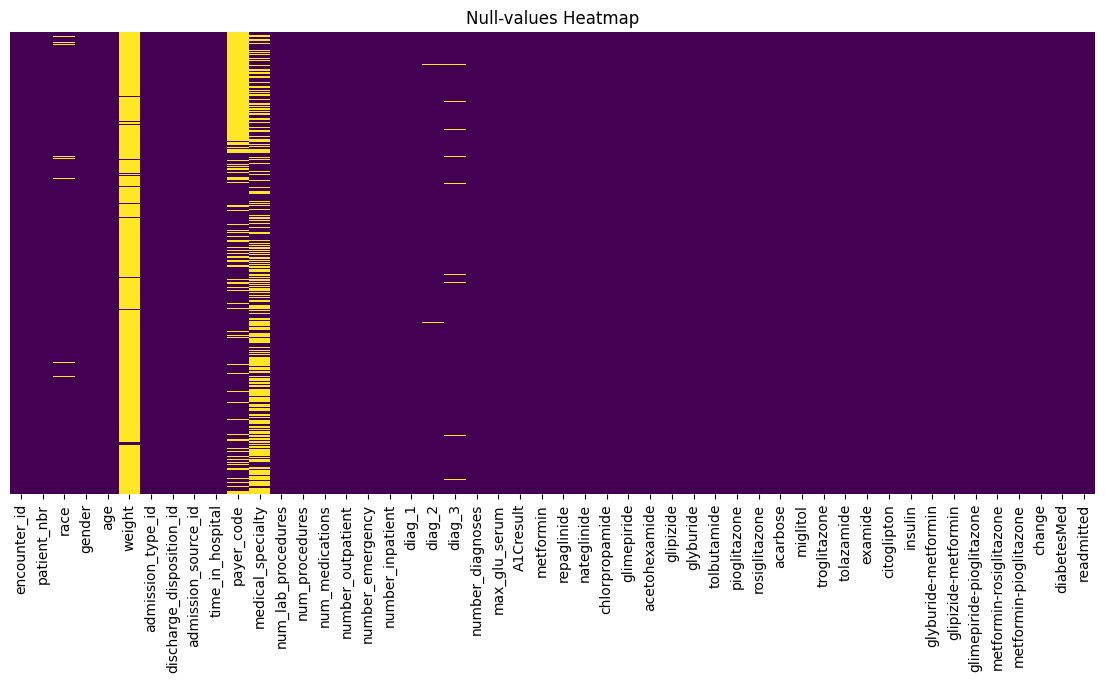

In [347]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
# Checks for missing data (?-values) in the diabeticData dataframe.
sns.heatmap(diabeticData == '?', cmap='viridis', cbar=False, yticklabels=False)
plt.title('Null-values Heatmap')
plt.show()

The yellow entries are missing datapoints. As can be seen, there are missing values in the following features:\
"race", "weight", "payer_code", "medical_specialty", "diag_1", "diag_2" and "diag_3".\
"weight" and "payer_code" were excluded from the work done by Strack et al., from the article the data originates from, so I will do the same.

In [348]:
diabeticData.drop(['weight', 'payer_code'], axis=1, inplace=True)

Next, I replace the missing values in "medical_specialty" with a dummy value, which was also done by Strack et al.

In [349]:
diabeticData["medical_specialty"].replace('?', "MissingSpecialty", inplace=True)

This can also be done with the "race" feature to eliminate the missing values in this feature.

In [350]:
diabeticData["race"].replace('?', "MissingRace", inplace=True)

As well as the three diagnosis features.

In [351]:
diabeticData["diag_1"].replace('?', '000', inplace=True)
diabeticData["diag_2"].replace('?', '000', inplace=True)
diabeticData["diag_3"].replace('?', '000', inplace=True)

Taking another look at the heatmap:

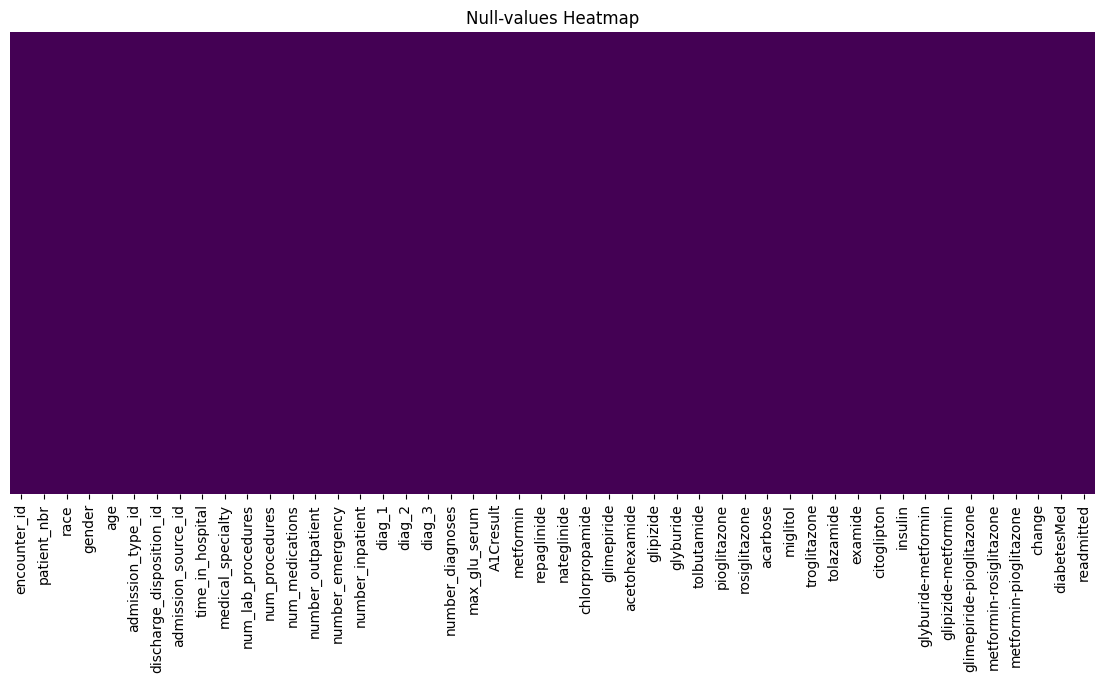

In [352]:
plt.figure(figsize=(14, 6))
sns.heatmap(diabeticData == '?', cmap='viridis', cbar=False, yticklabels=False)
plt.title('Null-values Heatmap')
plt.show()

To make sure I don't have any more missing values, I do a final check.

In [353]:
for column in diabeticData.columns:
    missingData = (diabeticData[column] == '?').sum()
    print(f"Missing values in {column}: {missingData}")

Missing values in encounter_id: 0
Missing values in patient_nbr: 0
Missing values in race: 0
Missing values in gender: 0
Missing values in age: 0
Missing values in admission_type_id: 0
Missing values in discharge_disposition_id: 0
Missing values in admission_source_id: 0
Missing values in time_in_hospital: 0
Missing values in medical_specialty: 0
Missing values in num_lab_procedures: 0
Missing values in num_procedures: 0
Missing values in num_medications: 0
Missing values in number_outpatient: 0
Missing values in number_emergency: 0
Missing values in number_inpatient: 0
Missing values in diag_1: 0
Missing values in diag_2: 0
Missing values in diag_3: 0
Missing values in number_diagnoses: 0
Missing values in max_glu_serum: 0
Missing values in A1Cresult: 0
Missing values in metformin: 0
Missing values in repaglinide: 0
Missing values in nateglinide: 0
Missing values in chlorpropamide: 0
Missing values in glimepiride: 0
Missing values in acetohexamide: 0
Missing values in glipizide: 0
Mis

The values of the diagnosis-features (diag_1, diag_2 and diag_3) are codes for specific diagnoses groups. 
I need to transform the datapoints in each diagnosis feature to their respective diagnosis. The table showing what diagnosis each diag-value represents is found in "Table 2" in Strack et al.'s article. 

In [354]:
# Defining a function to map the diagnosis code to the matching diagnosis.
def mapDiagnosis(diagCode):
    try:
        diagCode = float(diagCode)
    except ValueError:
        # Failsafe that returns any "string" values (some values start with E or V) to "Other".
        return 'Other'
    # Mapping each diagnosis code to their respective diagnoses.
    if 390 <= diagCode <= 459 or diagCode == 785:
        return 'Circulatory'
    elif 460 <= diagCode <= 519 or diagCode == 786:
        return 'Respiratory'
    elif 520 <= diagCode <= 579 or diagCode == 787:
        return 'Digestive'
    elif diagCode == 250:
        return 'Diabetes'
    elif 800 <= diagCode <= 999:
        return 'Injury'
    elif 710 <= diagCode <= 739:
        return 'Musculoskeletal'
    elif (580 <= diagCode <= 629) or diagCode == 788:
        return 'Genitourinary'
    elif 140 <= diagCode <= 239:
        return 'Neoplasms'
    elif diagCode == 000:
        return 'Missing / No diagnosis'
    else:
        return 'Other'

# Runs the mapping function on the three diagnosis features.
diagColumns = ['diag_1', 'diag_2', 'diag_3']
for col in diagColumns:
    diabeticData[col] = diabeticData[col].map(mapDiagnosis)

I plot the new diagnosis data for a visual representation of the amount of patients with each diagnosis

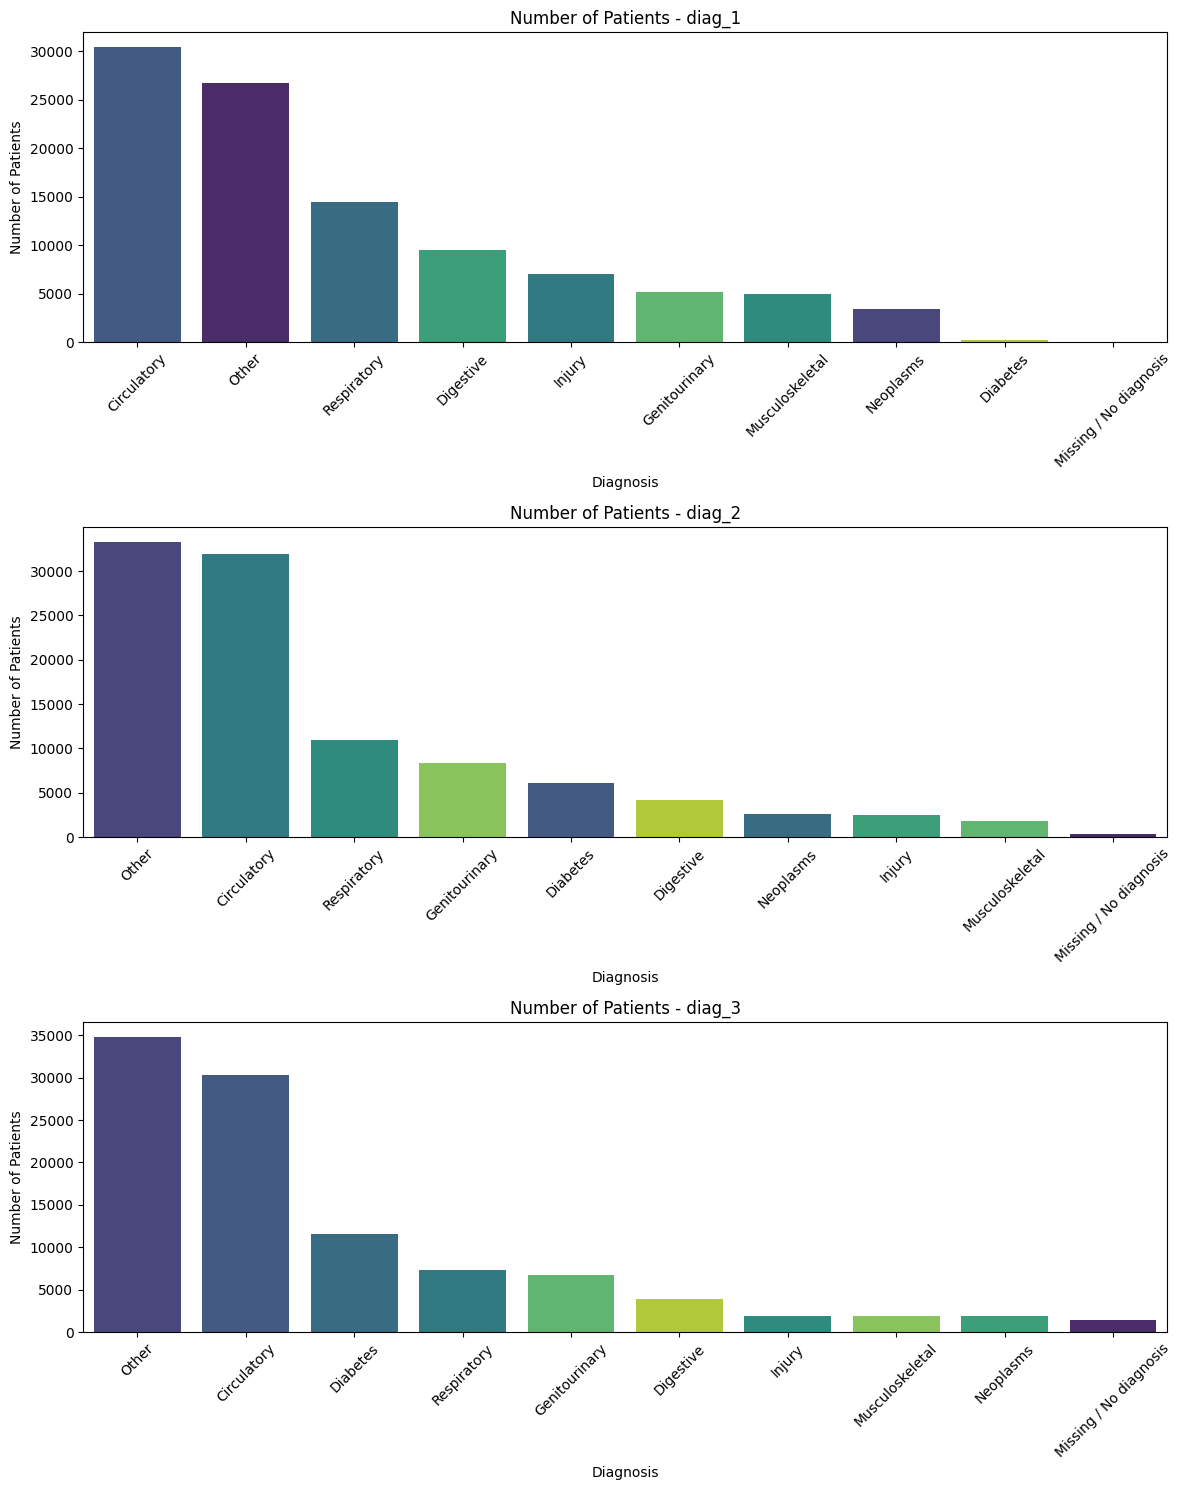

In [355]:
# Create subplots for each diagnosis.
fig, axes = plt.subplots(nrows=len(diagColumns), ncols=1, figsize=(12, 15))

# Iterate through each column and create a count plot.
for i, col in enumerate(diagColumns):
    sns.countplot(x=diabeticData[col], order=diabeticData[col].value_counts().index, palette='viridis', ax=axes[i], hue=diabeticData[col], legend=False)
    axes[i].set_title(f'Number of Patients - {col}')
    axes[i].set_ylabel('Number of Patients')
    axes[i].set_xlabel('Diagnosis')

    # Rotate x-axis labels.
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Thankfully there are very few missing datapoints.

Next I check for unique values in each column. If any column only has a single unique value I.E. all values are identical, they can safely be excluded from the dataset, as they have no effect on the readmission rate.

In [356]:
for column in diabeticData.columns:
    valueCounts = diabeticData[column].unique()
    print(f"Unique values in {column}:\n{valueCounts}\n")

Unique values in encounter_id:
[  2278392    149190     64410 ... 443854148 443857166 443867222]

Unique values in patient_nbr:
[  8222157  55629189  86047875 ... 140199494 120975314 175429310]

Unique values in race:
['Caucasian' 'AfricanAmerican' 'MissingRace' 'Other' 'Asian' 'Hispanic']

Unique values in gender:
['Female' 'Male' 'Unknown/Invalid']

Unique values in age:
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

Unique values in admission_type_id:
[6 1 2 3 4 5 8 7]

Unique values in discharge_disposition_id:
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]

Unique values in admission_source_id:
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]

Unique values in time_in_hospital:
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]

Unique values in medical_specialty:
['Pediatrics-Endocrinology' 'MissingSpecialty' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthoped

As can be seen, "examide" and "citoglipton" both have only 1 value; "No", which means these can be safely discarded.

In [357]:
diabeticData.drop(['examide', 'citoglipton'], axis=1, inplace=True)

Next, I check the target feature's value counts.

In [358]:
diabeticData["readmitted"].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

The target feature "readmitted" has three values: "NO", ">30" and "<30". I am reducing this feature to binary, as I only care about readmittance before 30 days. 1 for <30 days, 0 for else.

In [359]:
diabeticData = diabeticData.replace({"NO" :0, ">30" :0, "<30" :1})

# Checking the value counts again to make sure the features were converted to binary correctly.
diabeticData["readmitted"].value_counts()

readmitted
0    90409
1    11357
Name: count, dtype: int64

I plot the new readmittance data for a better visual representation.

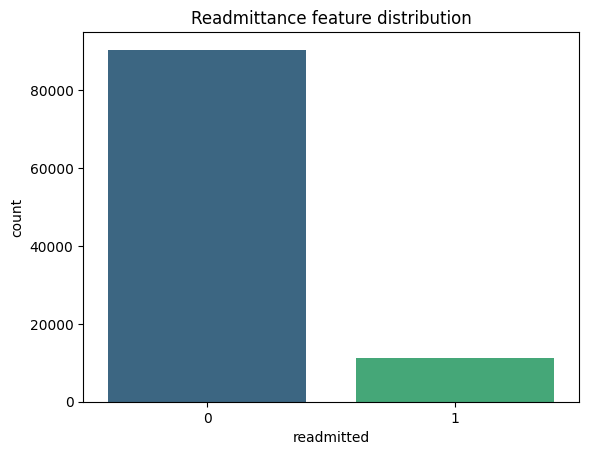

In [360]:
sns.countplot(x = "readmitted", hue="readmitted", data = diabeticData, palette="viridis", legend= False)
plt.title("Readmittance feature distribution")
plt.show()

The supports for the values in the readmittance feature are very skewed, which I need to take into consideration when I finally train some models on the data.

Taking a look at the current dataframe.

In [361]:
diabeticData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   medical_specialty         101766 non-null  object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

I see a few identifier features; "encounter_id" and "patient_nbr" which are unlikely to help a machine learning model make any predictions, so I am dropping them.

In [362]:
diabeticData.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

## Categorical data encoding

A bunch of the features are of type 'object' and thus need to be encoded to properly work. I use the LabelEncoder from sklearn to encode the categorical data into integer data types.

In [363]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

featuresToEncode = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

for i in featuresToEncode:
    diabeticData[i] = le.fit_transform(diabeticData[i])

diabeticData.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,0,5,23,0,1,38,41,0,...,0,1,1,0,0,0,0,1,0,0
1,2,0,1,0,0,6,3,19,59,0,...,0,3,1,0,0,0,0,0,1,0
2,0,0,2,0,0,6,2,19,11,5,...,0,1,1,0,0,0,0,1,1,0
3,2,1,3,0,0,6,2,19,44,1,...,0,3,1,0,0,0,0,0,1,0
4,2,1,4,0,0,6,1,19,51,0,...,0,2,1,0,0,0,0,0,1,0


All the categorial datapoints are now numerical.

Checking the data types of each features to make sure the conversion worked.

In [364]:
diabeticData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   race                      101766 non-null  int32
 1   gender                    101766 non-null  int32
 2   age                       101766 non-null  int32
 3   admission_type_id         101766 non-null  int64
 4   discharge_disposition_id  101766 non-null  int64
 5   admission_source_id       101766 non-null  int64
 6   time_in_hospital          101766 non-null  int64
 7   medical_specialty         101766 non-null  int32
 8   num_lab_procedures        101766 non-null  int64
 9   num_procedures            101766 non-null  int64
 10  num_medications           101766 non-null  int64
 11  number_outpatient         101766 non-null  int64
 12  number_emergency          101766 non-null  int64
 13  number_inpatient          101766 non-null  int64
 14  diag_1              

As can be seen, I now only have integer datatypes. But in order to use the data in a model, I need to scale the data properly. I use a standard scaler for this purpose.

In [365]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Firstly I set the feature matrix- and target feature.
X = diabeticData.drop(columns=['readmitted'])
y = diabeticData['readmitted']

# Then I split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afterwards i am initializing the scaler.
scaler = StandardScaler()

# Finally I fit the scaler on both the training and test sets.
X_train_SCALED = scaler.fit_transform(X_train)
X_test_SCALED = scaler.fit_transform(X_test)

I then use the "imbalanced-learn" package to undersample the majority class, in order to make up for the imbalanced support between the values in the target feature. 

In [366]:
from imblearn.under_sampling import RandomUnderSampler

# Undersampling the majority class by fitting the undersampler to the training set.
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train_SCALED, y_train)


## Training and predicting

Finally the data is ready to be fed to an ML algorithm. Since this is a classification problem, I start with the logistic regression model.

In [367]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Creating the model and fitting the resampled data.
model1 = LogisticRegression(max_iter=5000)
model1.fit(X_resampled, y_resampled)

# Predicting using the scaled test data.
y_pred = model1.predict(X_test_SCALED)

# Evaluating the predictions using Accuracy score, classification report and a confusion matrix.
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)


Accuracy: 0.6556450820477547
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.67      0.78     18069
           1       0.16      0.51      0.25      2285

    accuracy                           0.66     20354
   macro avg       0.54      0.59      0.51     20354
weighted avg       0.83      0.66      0.72     20354

[[12184  5885]
 [ 1124  1161]]


The precision for class 0 (not readmitted within 30 days) is 0.92, meaning 92% were correctly predicted, while the precision for class 1 (readmitted within 30 days) is only 0.16. 
The recall for class 0 is 0.67 while for class 1 it is 0.51, meaning the model only actually catches around half of the actual positives.
This means the model is good at predicting "not readmitted within 30 days" while bad at predicting "readmitted within 30 days". This can be because of the skewed support in the test set, which might have biased the model toward the majority class.

In [368]:
from sklearn.ensemble import RandomForestClassifier

# Creating the model and fitting the resampled data.
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_resampled, y_resampled)

# Predicting using the scaled test data.
y_pred = model2.predict(X_test_SCALED)

# Evaluating the predictions using Accuracy score, classification report and a confusion matrix.
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)

Accuracy: 0.6163407683993318
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.62      0.74     18069
           1       0.17      0.60      0.26      2285

    accuracy                           0.62     20354
   macro avg       0.55      0.61      0.50     20354
weighted avg       0.84      0.62      0.69     20354

[[11166  6903]
 [  906  1379]]


While lower in overall precision, the random forest classifier model has ever-so-slightly higher precision and recall values for positive predictions, compared to the logistic regressor, meaning it is slightly less biased towards the majority class, and thus more evenly weighted.

In [369]:
from sklearn.ensemble import GradientBoostingClassifier

# Creating the model and fitting the resampled data.
model3 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model3.fit(X_resampled, y_resampled)

# Predicting using the scaled test data.
y_pred = model3.predict(X_test_SCALED)

# Evaluating the predictions using Accuracy score, classification report and a confusion matrix.
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)

Accuracy: 0.6212538076053847
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.62      0.74     18069
           1       0.17      0.63      0.27      2285

    accuracy                           0.62     20354
   macro avg       0.55      0.62      0.51     20354
weighted avg       0.84      0.62      0.69     20354

[[11206  6863]
 [  846  1439]]


While still being lower in overall precision than the logistic regressor, the gradient boosting classifier is slightly higher in precision, recall and f1-score than both the logistic regressor and the random forest classifier.

## Conclusion

All three models were effective when predicting the negative class (not readmitted), but were very imprecise when predicting the positive class (readmitted). 

The model with the highest overall precision was the logistic regressor, but the model with the most evenly distributed precision and recall values was the gradient boosting classifier. 

The lack of precision when predicting the positive value is probably because of the skewed supports of the test set, within which the negative value has many more entries. This may also mean the high precision in the negative class can be misleading, if the models simply choose to predict the majority class most of the time. 

Although the precision, recall and f1 scores are affected buy the skewed supports in the minor/majority classes, the weighted averages, which takes the size of the supports into consideration when it is calculated, is fairly high in most of the models tested. This further cements the conclusion that the models heavily bias the negative class due to the imbalance in the supports. 